In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


T = np.array([308.15, 309.15, 310.15, 311.15, 312.15, 313.15, 314.15, 315.15, 316.15, 317.15,
              318.15, 319.15, 320.15, 321.15, 322.15, 323.15, 324.15, 325.15, 326.15, 327.15,
              328.15, 329.15, 330.15, 331.15, 332.15, 333.15, 334.15, 335.15, 336.15, 337.15,
              338.15, 339.15, 340.15, 341.15, 342.15, 343.15, 344.15, 345.15, 346.15, 347.15,
              348.15, 349.15, 350.15, 351.15, 352.15, 353.15])


V_heimian = np.array([0.142, 0.149, 0.157, 0.163, 0.17, 0.178, 0.184, 0.192, 0.199, 0.206,
                      0.213, 0.221, 0.228, 0.235, 0.243, 0.25, 0.258, 0.266, 0.274, 0.281,
                      0.289, 0.297, 0.305, 0.313, 0.322, 0.329, 0.338, 0.346, 0.355, 0.364,
                      0.372, 0.38, 0.389, 0.398, 0.407, 0.416, 0.426, 0.434, 0.444, 0.453,
                      0.461, 0.472, 0.482, 0.491, 0.5, 0.506])


V_guanghua = np.array([0.077, 0.08, 0.079, 0.079, 0.079, 0.08, 0.08, 0.08, 0.082, 0.082,
                       0.083, 0.084, 0.085, 0.086, 0.088, 0.09, 0.091, 0.092, 0.094, 0.094,
                       0.096, 0.097, 0.097, 0.096, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105,
                       0.107, 0.107, 0.107, 0.109, 0.109, 0.112, 0.113, 0.112, 0.114, 0.117,
                       0.118, 0.119, 0.12, 0.121, 0.121, 0.121])


V_cucao = np.array([0.075, 0.076, 0.078, 0.078, 0.078, 0.078, 0.079, 0.079, 0.08, 0.082,
                    0.082, 0.084, 0.084, 0.085, 0.086, 0.088, 0.089, 0.091, 0.093, 0.092,
                    0.092, 0.094, 0.097, 0.097, 0.098, 0.098, 0.099, 0.1, 0.102, 0.104,
                    0.104, 0.104, 0.105, 0.106, 0.107, 0.107, 0.108, 0.11, 0.11, 0.111,
                    0.112, 0.114, 0.114, 0.115, 0.116, 0.117])


[-1.70389900e-08  2.26032569e-05 -1.12035187e-02  2.46721481e+00
 -2.04038274e+02]


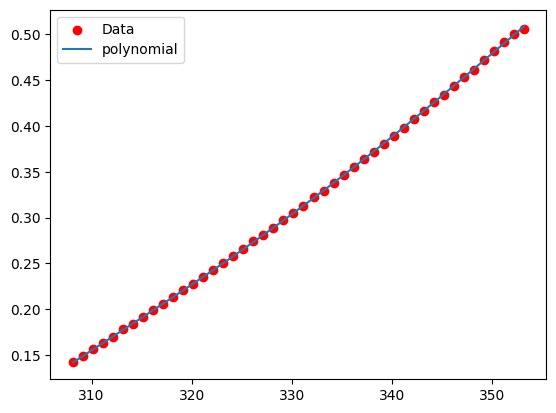

In [2]:
# poloynomial
def radiation(x, A, B, C, D, E):
    return A * x ** 4 + B * x ** 3 + C * x ** 2 + D * x + E


SIGMA = optimize.curve_fit(radiation, T, V_heimian)[0]
print(SIGMA)

A, B, C, D, E = SIGMA

fig = plt.figure()
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, radiation(T, A, B, C, D, E), label='polynomial')
plt.legend(loc='best')
plt.show()


[ 8.11086983e-11 -4.67019453e-08  2.59810038e-05 -5.48111798e-03]


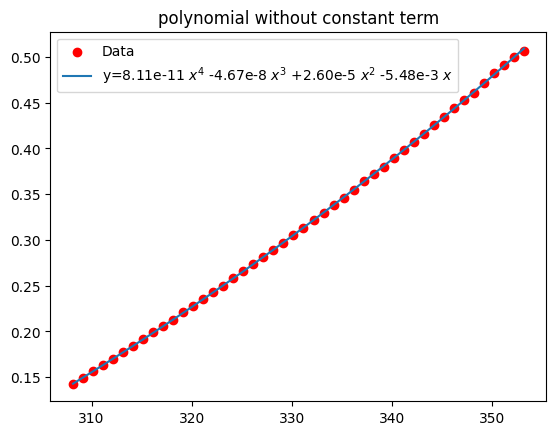

In [21]:
# poloynomial without constant term
def radiation(x, A, B, C, D):
    return A * x ** 4 + B * x ** 3 + C * x ** 2 + D * x


SIGMA = optimize.curve_fit(radiation, T, V_heimian)[0]
print(SIGMA)

A, B, C, D = SIGMA

fig = plt.figure()
plt.title('polynomial without constant term')
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, radiation(T, A, B, C, D), label='y=8.11e-11 $x^4$ -4.67e-8 $x^3$ +2.60e-5 $x^2$ -5.48e-3 $x$')
plt.legend(loc='best')
plt.show()


[2.68600417e-11]


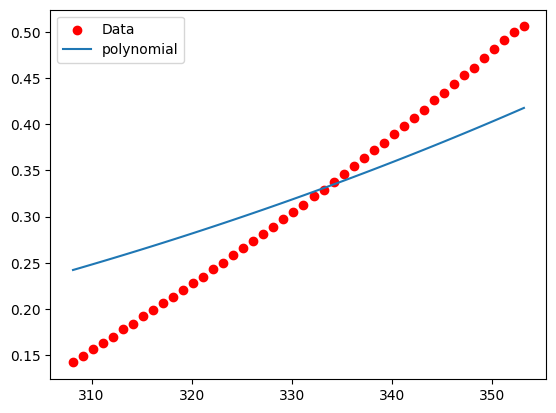

In [15]:
# poloynomial
def radiation(x, A):
    return A * x ** 4


SIGMA = optimize.curve_fit(radiation, T, V_heimian)[0]
print(SIGMA)

A = SIGMA

fig = plt.figure()
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, radiation(T, A), label='polynomial')
plt.legend(loc='best')
plt.show()


[  9.07918501 -53.88016285]


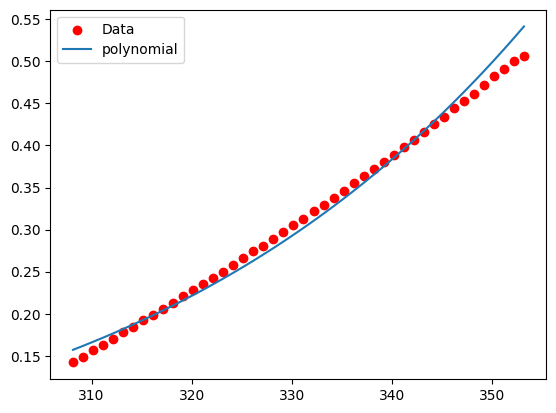

In [6]:
# linear fitting
log_T = np.log(T)
log_V_heimian = np.log(V_heimian)


def radiation(x, A, B):
    return A * x + B


SIGMA = optimize.curve_fit(radiation, log_T, log_V_heimian)[0]
print(SIGMA)

A, B = SIGMA

fig = plt.figure()
plt.scatter(T, V_heimian, label='Data', color='red', marker='o')
plt.plot(T, np.exp(radiation(log_T, A, B)), label='polynomial')
plt.legend(loc='best')
plt.show()

print(np.exp())
